[Table of Contents](./table_of_contents.ipynb)

# Многомерный гауссовский процесс

Моделирование неопределенности в нескольких измерениях

In [1]:
%matplotlib inline

In [42]:
#format the book
import book_format
book_format.set_style()

## Многомерные Нормальные Распределения

$\mathcal{N}(\mu, \sigma^2)$. Более формальным термином для этого является *одномерное нормальное распределение*, где одномерный означает "одна переменная". Распределение вероятностей Гаусса известно как *одномерное нормальное распределение*.

Каким может быть *многомерное нормальное распределение*? *Многомерность* означает множество переменных. Наша цель состоит в том, чтобы иметь возможность представлять нормальное распределение с несколькими измерениями. Не обязательно имею в виду пространственные измерения - если мы отслеживаем положение, скорость и ускорение самолета в (x, y, z), это дает нам девятимерную проблему. Рассмотрим двумерный случай. Мы видим, что для $N$ измерений нам нужны $N$ средних, которые мы расположим в матрице столбцов (векторе) следующим образом:

$$
\mu = \begin{bmatrix}\mu_1\\\mu_2\\ \vdots \\\mu_n\end{bmatrix}
$$

Допустим $x = 2$ и $y = 17$.

$$
\mu = \begin{bmatrix}2\\17\end{bmatrix} 
$$

Следующий шаг - выражение для дисперсий. На первый взгляд мы можем подумать, что нам также понадобятся отклонения для N измерений. Мы могли бы сказать, что дисперсия для x равна 10, а дисперсия для y равна 4, вот так.

$$\sigma^2 = \begin{bmatrix}10\\4\end{bmatrix}$$ 

Но прежде чем мы сможем понять многомерные нормальные распределения, нам нужно понять математику, лежащую в основе корреляций и ковариаций.

## Корреляция и ковариация

*Ковариация* описывает, насколько сильно различаются две переменные вместе. Ковариация - это сокращение от *коррелированных дисперсий*. *Ковариация* - это мера того, насколько две переменные изменяются по отношению друг к другу. Например, по мере увеличения роста вес также обычно увеличивается.

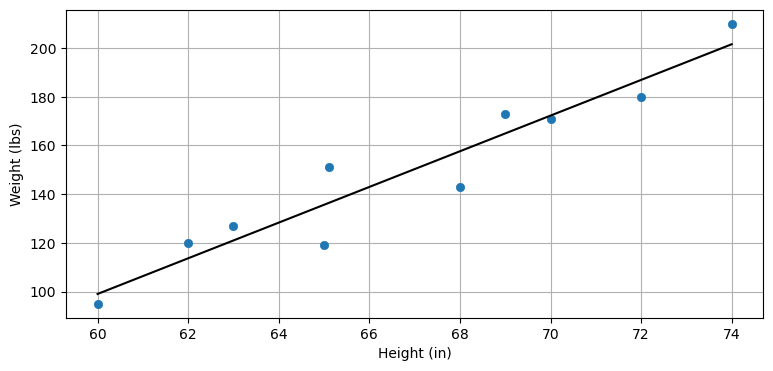

In [48]:
from kf_book.gaussian_internal import plot_correlated_data

height = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
weight = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]
plot_correlated_data(height, weight, 'Height (in)', 'Weight (lbs)', False)

Мы предполагаем, что связь между переменными линейна. То есть прямая линия хорошо подходит для данных. Я провел прямую линию по данным на приведенной выше диаграмме. Концепция "нелинейной корреляции" существует, но мы не будем ее использовать.


$$ COV(X, Y) = \sigma_{xy} = \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]$$

$\mathbb E[X]$

$$\mathbb E[X] =  \begin{cases} \sum_{i=1}^n p_ix_i & \mbox{discrete}\\ \int_{-\infty}^\infty f(x)\, x & \mbox{continuous}\end{cases}$$

Мы предполагаем, что каждая точка данных равновероятна, поэтому вероятность каждой из них равна $\frac{1}{N}$

$$\mathbb E[X] =  \frac{1}{N}\sum_{i=1}^n x_i$$


$$\begin{aligned}VAR(X) = \sigma_x^2 &= \mathbb E[(X - \mu)^2]\\
COV(X, Y) = \sigma_{xy} &= \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$

в частности, если вы вычислите $COV(X, X)$, вы получите уравнение для $VAR(X)$, которое подтверждает мое утверждение о том, что дисперсия вычисляет, как случайная величина внутри себя.

Мы используем *ковариационную матрицу* для обозначения ковариаций многомерного нормального распределения, и это выглядит так:
$$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$

Диагональ содержит дисперсию для каждой переменной, а недиагональные элементы содержат ковариацию между переменными $i^{th}$ и $j^{th}$. Таким образом, $\sigma_3^2$ - это дисперсия третьей переменной, а $\sigma_{13}$ - ковариация между первой и третьей переменными.

Ковариация, равная 0, указывает на отсутствие корреляции. Если дисперсия для $x$ равна 10, дисперсия для $y$ равна 4, и между $x$ и $y$ нет линейной корреляции, то мы бы написали

$$\Sigma = \begin{bmatrix}10&0\\0&4\end{bmatrix}$$

Если бы была небольшая положительная корреляция между $x$ и $y$, мы могли бы иметь

$$\Sigma = \begin{bmatrix}10&1.2\\1.2&4\end{bmatrix}$$

где 1.2 - ковариация между $x$ и $y$. Я говорю, что корреляция "мала", потому что ковариация 1,2 мала по сравнению с дисперсиями 10.

Если бы существовала большая отрицательная корреляция между $x$ и $y$, мы могли бы иметь
$$\Sigma = \begin{bmatrix}10&-9.7\\-9.7&4\end{bmatrix}$$

Ковариационная матрица симметрична. В конце концов, ковариация между $x$ и $y$ всегда равна ковариации между $y$ и $x$. То есть
$\sigma_{xy}=\sigma_{yx}$

Пример есть набор измерений H=[1.8, 2.0, 1.7, 1.9, 1.6]  и W = [70.1, 91.2, 59.5, 93.2, 53.5]

$$\begin{aligned}
\mathit{VAR}(H) &= E[(H - \mu_H)^2] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i - \mu_H)^2 \\
&= \frac{1}{5}\left[(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2\right] \\
&= 0.02
\end{aligned}$$


$$\Sigma = \begin{bmatrix}\sigma_H^2 & \sigma_{H,W} \\
\sigma_{W,H} & \sigma_{W}^2\end{bmatrix}$$

$$\begin{aligned}
\mu_W &= \frac{1}{5}(70.1 + 91.2 + 59.5 + 93.2 + 53.5) = 73.5 \\
\sigma_W^2 &= \frac{1}{5}\left[(70.1-73.5)^2 + (91.2-73.5)^2 + (59.5-73.5)^2 + (93.2-73.5)^2 + (53.5-73.5)^2\right] \\
&= 261.8
\end{aligned}$$


$$\begin{aligned}
\sigma_{H,W} &= \mathbb E\big[(H-\mu_H)(W-\mu_W)\big] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i-\mu_H)(W_i-\mu_W) \\
&= \frac{1}{5}[(1.8-1.8)(70.1-73.5) + (2-1.8)(91.2-73.5) + (1.7-1.8)(59.5-73.5)\, +\\
&\, \, \, \,  \, (1.9-1.8)(93.2-73.5) + (1.6-1.8)(53.5-73.5)] \\
&= 2.18
\end{aligned}$$


In [44]:
import numpy as np

W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[  0.025,   2.727],
       [  2.727, 327.235]])

NumPy применяет поправку для небольших размеров выборки; он использует $\frac{1}{N-1}$ в качестве термина нормализации вместо $\frac{1}{N}$.

Это немного выходит за рамки данной книги. Вкратце, предположим, что фактический размер класса составляет 200 студентов, и мы взяли выборку из 5 студентов для выполнения этого вычисления, потому что мы не могли позволить себе измерить и взвесить всех 200 студентов. Почти наверняка в нашей оценке будет какая-то ошибка, потому что выборка вряд ли будет идеально представлять класс. По мере приближения размера нашей выборки к 200 ошибка будет приближаться к 0. Мы говорим, что в последнем нет *смещения* и что у нас есть *несмещенная оценка*. Напротив, когда мы берем небольшую выборку, наблюдается смещение (ошибка ненулевая), и у нас есть *смещенная оценка*.

Если ошибка равна нулю, имеет смысл разделить на $N$. Я не буду доказывать, почему, но для предвзятых оценок мы используем $\frac{1}{N-1}$ для корректировки небольшого размера выборки.

In [45]:
np.cov(H, W, bias=1)

array([[  0.02 ,   2.182],
       [  2.182, 261.788]])

Что говорит нам эта матрица? Это говорит нам, что разница в H составляет 0,02 $m^2$, а разница в W составляет 261,788 $kg^2$. Кроме того, это говорит нам о том, что W и H положительно коррелируют.

In [46]:
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)
np.cov(X, Y)

array([[6.956, 6.956],
       [6.956, 6.956]])

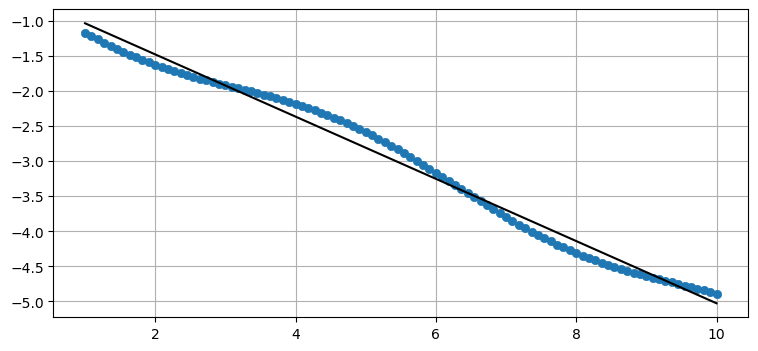

[[ 6.956 -3.084]
 [-3.084  1.387]]


In [49]:
X = np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X)*.2)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

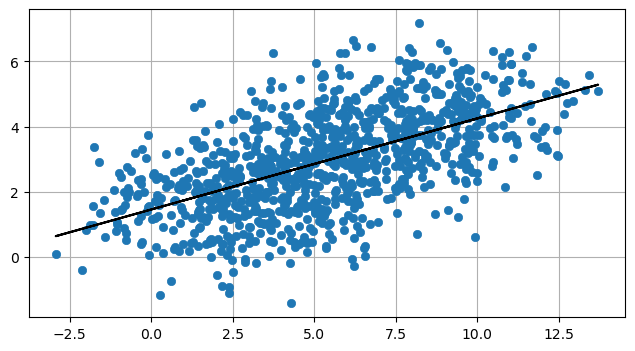

[[10.394  2.903]
 [ 2.903  2.347]]


In [51]:
from numpy.random import randn
X = np.linspace(1, 10, 1000) + randn(1000)*2
Y = np.linspace(1, 5, 1000) + randn(1000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

Мы видим, что ковариация меньше по отношению к дисперсиям, что отражает более низкую корреляцию между $X$ и $Y$. Мы все еще можем провести прямую линию через эти данные, но в данных гораздо больше различий.

Наконец, вот ковариация между совершенно случайными данными.

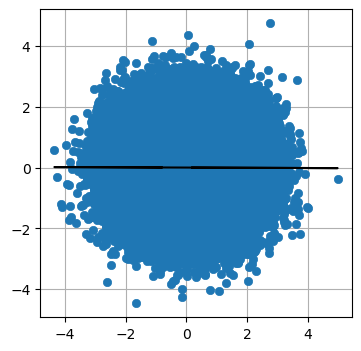

[[ 1.002 -0.004]
 [-0.004  0.994]]


In [53]:
X = randn(100000)
Y = randn(100000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

## Многомерное нормальное распределение

$$ 
f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big [{-\frac{1}{2}}{(x-\mu)^2}/\sigma^2 \Big ]
$$


$$
f(\mathbf{x},\, \mu,\,\Sigma) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}\, \exp  \Big [{ -\frac{1}{2}(\mathbf{x}-\mu)^\mathsf{T}\Sigma^{-1}(\mathbf{x}-\mu) \Big ]}
$$


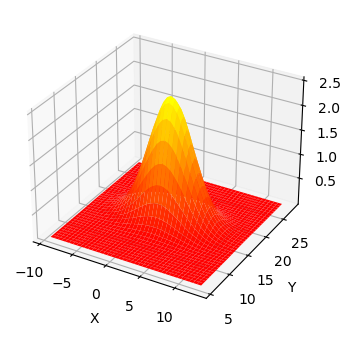

In [54]:
import kf_book.mkf_internal as mkf_internal

mean = [2., 17.]
cov = [[10., 0.], 
       [0., 4.]]

mkf_internal.plot_3d_covariance(mean, cov)

Среднее $\mu=[\begin{smallmatrix}2\\17\end{smallmatrix}]$ ковариация $\Sigma=[\begin{smallmatrix}10&0\\0&4\end{smallmatrix}]$. Трехмерная фигура показывает плотность вероятности для любого значения $(X, Y)$ по оси Z. Самая высокая точка 3D-поверхности находится на  средних значениях $X$ and $Y$. 

Строго говоря, это *совместная функция плотности вероятности*. Таким образом, самая высокая вероятность быть рядом (2, 17), средняя вероятность быть рядом (5, 14) и очень низкая вероятность быть рядом (10, 10). Как и в случае с одномерным случаем, это *плотность вероятности*, а не *вероятность*. Непрерывные распределения имеют бесконечный диапазон, и поэтому вероятность оказаться точно в (2, 17) или любой другой точке равна 0%. Мы можем вычислить вероятность нахождения в заданном диапазоне, вычислив объем под поверхностью с помощью интеграла.

In [67]:
from filterpy.stats import gaussian, multivariate_gaussian

Найдем плотность вероятности того, что самолет находится на уровне (2.5, 7.3), если мы считаем, что она находится на уровне (2, 7) с дисперсией 8 для $x$ и дисперсией 3 для $y$.

In [68]:
x = [2.5, 7.3]

In [69]:
mu = [2.0, 7.0]

Определим нашу ковариационную матрицу. В постановке задачи мы не упоминали о какой-либо корреляции между $x$ и $y$, и мы будем считать, что ее нет.  Фильтры Калмана используют имя $\textbf{P}$ для ковариационной матрицы.

In [70]:
P = [[8., 0.], 
     [0., 3.]]

In [71]:
%precision 4
multivariate_gaussian(x, mu, P)

0.0315

In [72]:
import scipy
from scipy.stats import multivariate_normal
print(f'{multivariate_normal(mu, P).pdf(x):.4f}')


0.0315


Пришло время определить некоторые термины. *Совместная вероятность*, обозначаемая $P(x,y)$, - это вероятность того, что произойдет как $x$, так и $y$. Например, если вы бросаете два кубика $P(2,5)$ - это вероятность того, что на первый кубик выпадет 2, а второй - 5. Предполагая, что кубик шестигранный и справедливый, вероятность $P(2,5)= \frac{1}{6}\times \frac{1}{6}=\frac{1}{36}$. На 3D-диаграмме выше показана *совместная функция плотности вероятности*.

*Предельная вероятность* - это вероятность того, что событие произойдет независимо от любого другого события. На графике выше гауссова кривая, нарисованная слева, является предельной для $Y$. Это вероятность того, что самолет окажется в любой позиции в $Y$, не принимая во внимание значение $X$.

Вместо построения поверхности, показывающей распределение вероятностей, я сгенерирую 1000 точек с распределением $[\begin{smallmatrix}8&0\\0&3\end{smallmatrix}]$.

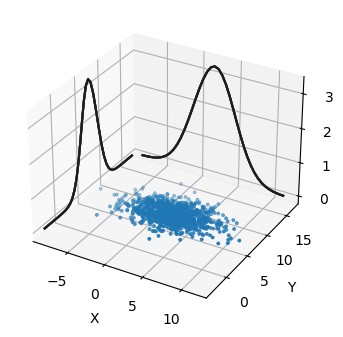

In [11]:
mkf_internal.plot_3d_sampled_covariance(mu, P)

Мы можем думать о выбранных точках как о возможных местах нахождения самолета, учитывая эти конкретные средние значения и ковариации. Контуры сбоку показывают предельную вероятность для $X$ и $Y$. Мы видим, что он с гораздо большей вероятностью окажется в (2, 7), где много точек, чем в (-5, 5), где их мало. Однако, нелегко определить, имеют ли $X$ и $Y$ одинаковую дисперсию и насколько они коррелированы.

На контурных диаграммах отображается диапазон значений, которые многомерный гауссовский принимает для определенного стандартного отклонения. Это все равно, что вырезать горизонтальный срез из 3D-графика.

Эти графики показывают форму среза для 3 стандартных отклонений.

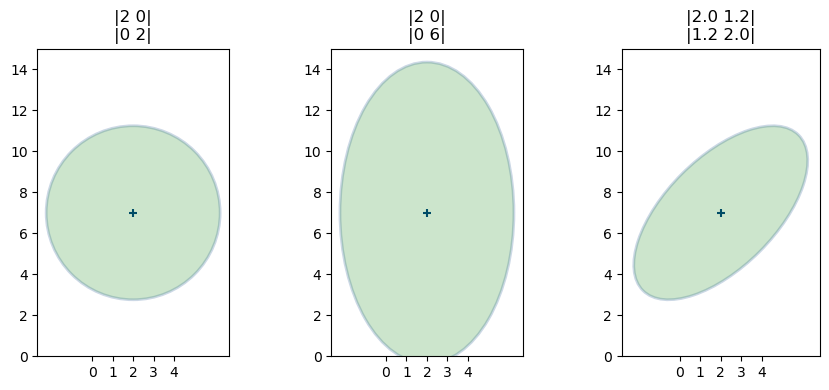

In [73]:
mkf_internal.plot_3_covariances()


<img src='animations/multivariate_ellipse.gif'>



Эти графики выглядят как круги и эллипсы. Действительно, оказывается, что любой срез многомерного гауссова является эллипсом. Следовательно, в статистике мы не называем эти "контурные графики", а либо "эллипсами ошибок", либо "эллипсами уверенности"; термины взаимозаменяемы.

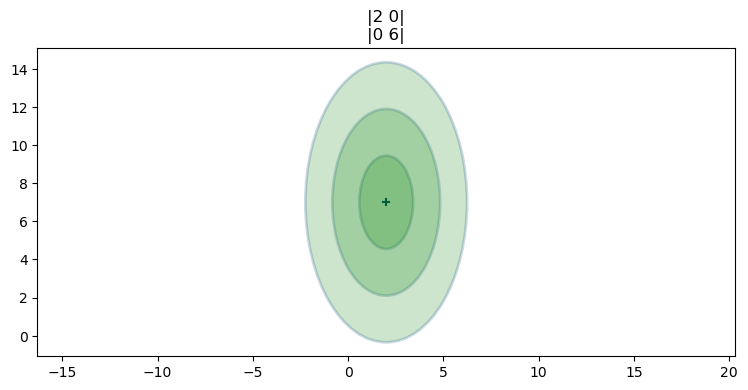

In [75]:
from filterpy.stats import plot_covariance_ellipse
import matplotlib.pyplot as plt

P = [[2, 0], [0, 6]]
plot_covariance_ellipse((2, 7), P, fc='g', alpha=0.2, 
                        std=[1, 2, 3],
                        title='|2 0|\n|0 6|')
plt.gca().grid(b=False);

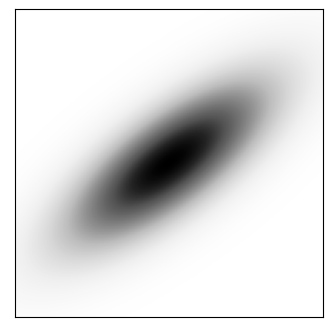

In [76]:
from kf_book.nonlinear_plots import plot_cov_ellipse_colormap
plot_cov_ellipse_colormap(cov=[[2, 1.2], [1.2, 1.3]]);

$$
\mathbf{\mu} =\begin{bmatrix}2\\7\end{bmatrix},\, \,
\Sigma = \begin{bmatrix}2&0\\0&2 \end{bmatrix}
$$ 

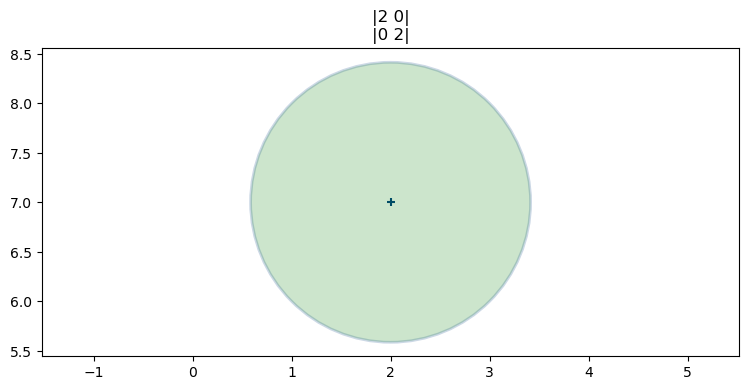

In [77]:
x = [2, 7]
P = [[2, 0], [0, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                       title='|2 0|\n|0 2|')
plt.gca().grid(b=False)

Эллипс показывает нам количество ошибок в наших убеждениях. Крошечный кружок означал бы, что у нас очень маленькая ошибка, а очень большой круг указывает на большую ошибку в наших убеждениях. Форма эллипса показывает нам геометрическую взаимосвязь ошибок в $X$ и $Y$. Здесь у нас есть круг, поэтому ошибки в $X$ и $Y$ одинаково вероятны.

$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&0\\0&6\end{bmatrix}
$$

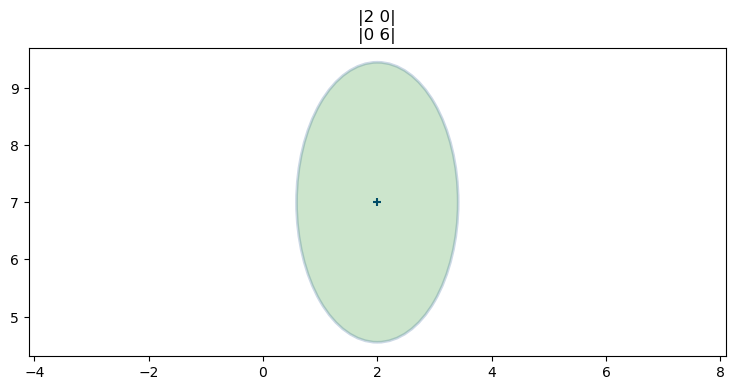

In [78]:
x = [2, 7]
P = [[2, 0], [0, 6]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 0|\n|0 6|')
plt.gca().grid(b=False)

На этот раз мы используем другую дисперсию для $X$ ($\sigma_x^2=2$) против $Y$ ($\sigma^2_y=6$). В результате получается высокий и узкий эллипс. Мы видим, что гораздо больше неопределенности в $Y$ по сравнению с $X$. В обоих случаях мы считаем, что объект находится в (2, 7), но неопределенности разные.


$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&1.2\\1.2&2\end{bmatrix}
$$

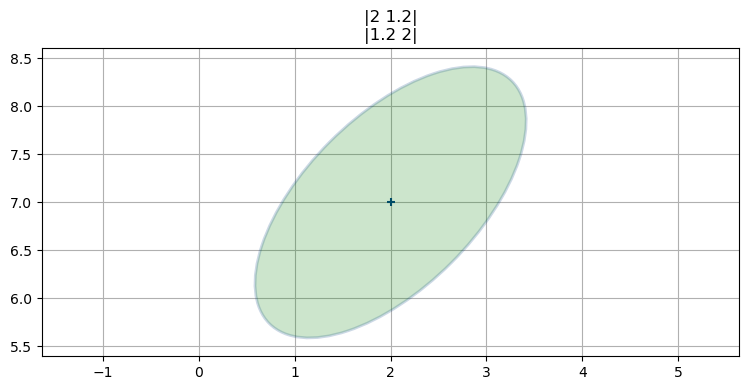

In [79]:
x = [2, 7]
P = [[2, 1.2], [1.2, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 1.2|\n|1.2 2|')

Это первый контур, который имеет значения в недиагональных элементах ковариации, и это первый контурный график с наклонным эллипсом. Это не случайное совпадение. Эти два факта говорят нам об одном и том же. Наклонный эллипс говорит нам, что значения $x$ и $y$ каким-то образом коррелируют. Недиагональные элементы в ковариационной матрице ненулевые, что указывает на существование корреляции.

In [80]:
cov_hw = np.cov(np.vstack((height, weight)), bias=1)
cov_hw

array([[  18.525,  135.701],
       [ 135.701, 1092.29 ]])

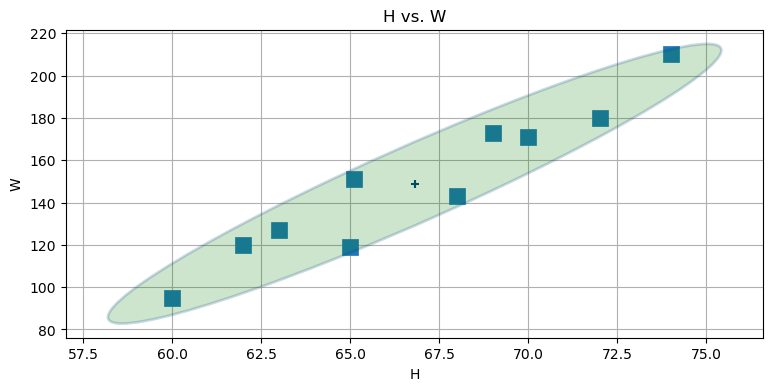

In [81]:
plt.scatter(height, weight, s=120, marker='s')
plt.title('H vs. W')
plt.xlabel('H'); plt.ylabel('W')
plot_covariance_ellipse((np.mean(height), np.mean(weight)), cov_hw, fc='g', 
                        alpha=0.2, axis_equal=False, std=2)

Эллипс ковариации показывает, как данные "разбросаны" по отношению друг к другу. Узкий эллипс, подобный этому, говорит о том, что данные очень коррелированы.  Эллипс наклоняется вправо, указывая нам на положительную корреляцию - по мере увеличения x y также увеличивается. Если бы эллипс наклонился влево, то корреляция была бы отрицательной - по мере увеличения x y уменьшается. Мы можем видеть это в следующем сюжете:

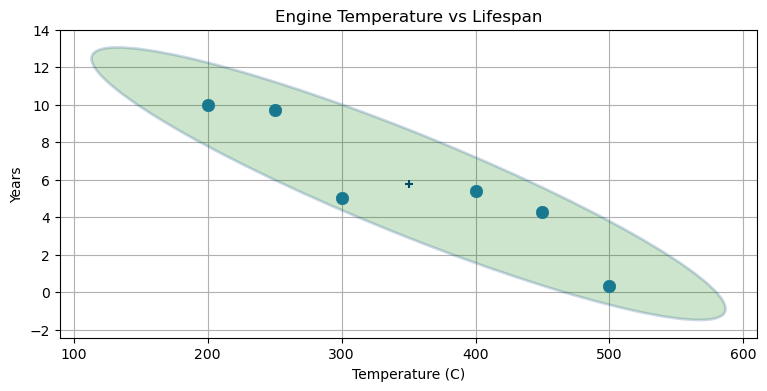

In [82]:
max_temp = [200, 250, 300, 400, 450, 500]
lifespan = [10, 9.7, 5, 5.4, 4.3, 0.3]

plt.scatter(max_temp, lifespan, s=80)
cov = np.cov(np.vstack((max_temp, lifespan)))
plot_covariance_ellipse((np.mean(max_temp), np.mean(lifespan)), cov, fc='g', 
            alpha=0.2, axis_equal=False, std=2)
plt.title('Engine Temperature vs Lifespan')
plt.xlabel('Temperature (C)'); plt.ylabel('Years');

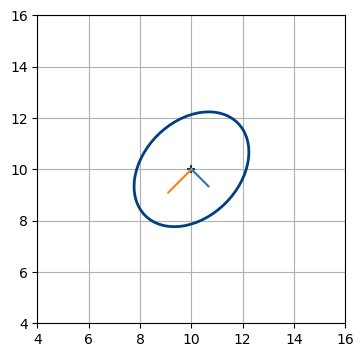

In [20]:
from ipywidgets import interact
from kf_book.book_plots import figsize, FloatSlider

fig = None
def plot_covariance(var_x, var_y, cov_xy):
    global fig
    if fig: plt.close(fig)
    fig = plt.figure(figsize=(4,4))
    P1 = [[var_x, cov_xy], [cov_xy, var_y]]

    plot_covariance_ellipse((10, 10), P1, axis_equal=False,
                            show_semiaxis=True)

    plt.xlim(4, 16)
    plt.gca().set_aspect('equal')
    plt.ylim(4, 16)

    
with figsize(y=6):
    interact (plot_covariance,           
          var_x=FloatSlider(5, min=0, max=20), 
          var_y=FloatSlider(5, min=0, max=20), 
          cov_xy=FloatSlider(1.5, min=0, max=50, step=.2));

## Использование корреляций для улучшения оценок

Предположим, мы считаем, что наш объект находится в точке (5, 10) с некоторой заданной ковариацией. Если стандартное отклонение в x и y составляет каждые 2 метра, но они сильно коррелированы, контур ковариации будет выглядеть примерно так.

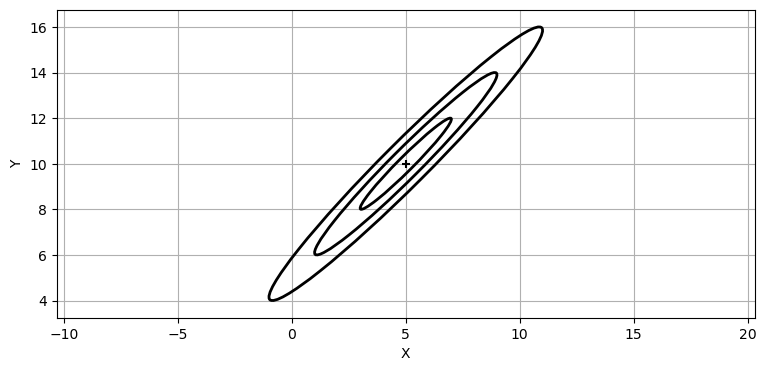

In [83]:
P = [[4, 3.9], [3.9, 4]]

plot_covariance_ellipse((5, 10), P, ec='k', std=[1, 2, 3])
plt.xlabel('X')
plt.ylabel('Y');

Теперь предположим, что мы знаем, что $x=7,5$. Что мы можем сделать о значении для $y$? Позиция, скорее всего, будет находиться в пределах эллипса ковариации 3$\sigma$. Мы можем определить положение в *y* на основе ковариационной матрицы, потому что существует корреляция между *x* и *y*. Вероятный диапазон значений для y показан в виде синего круга.

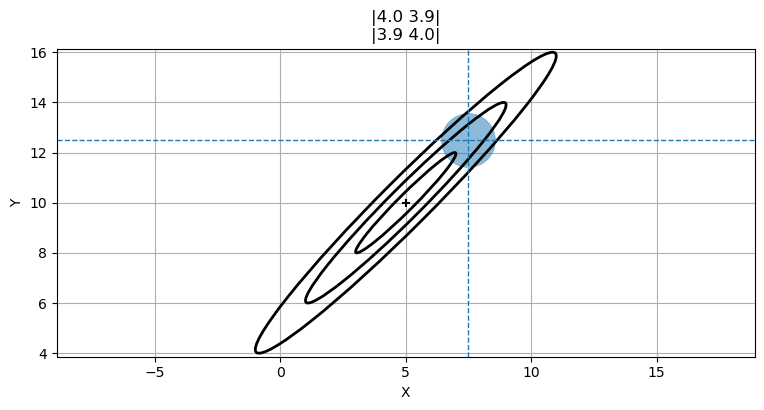

In [84]:
mkf_internal.plot_correlation_covariance()

Можем предсказать, что $y$, скорее всего, будет около 12. Значение $y=-10$ крайне маловероятно.

Несколько слов о *корреляции* и *независимости*. Если переменные *независимы*, они могут изменяться отдельно. Переменные могут быть некоррелированными, но зависимыми. Например, рассмотрим $y=x^2$. Корреляция - это линейное измерение, поэтому $x$ и $y$ не коррелированы. Однако $y$ зависит от $x$.

## Умножение многомерных гауссовых распределений

Умножив 2 гауссианы вместе в результате получился еще один гауссовский с меньшей дисперсией.

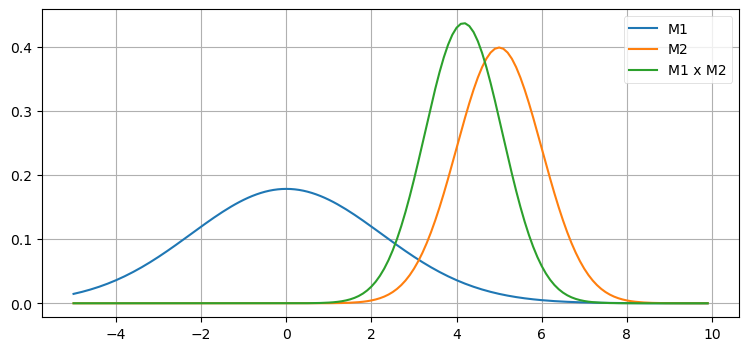

In [85]:
mkf_internal.plot_gaussian_multiply()



Вот уравнения для умножения многомерного гауссова. Заглавная сигма ($\Sigma$) указывает, что это матрицы, а не скаляры. В частности, они являются ковариационными матрицами:

$$\begin{aligned}
\mu &= \Sigma_2(\Sigma_1 + \Sigma_2)^{-1}\mu_1 + \Sigma_1(\Sigma_1 + \Sigma_2)^{-1}\mu_2 \\
\Sigma &= \Sigma_1(\Sigma_1+\Sigma_2)^{-1}\Sigma_2
\end{aligned}$$


Чтобы дать вам некоторое представление об этом, вспомните уравнения для умножения одномерного гауссовского:

$$\begin{aligned}
\mu &=\frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1} {\sigma_1^2 + \sigma_2^2}, \\
\sigma^2 &= \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2}
\end{aligned}$$


$$\begin{aligned}
\mu &\approx \frac{\Sigma_2\mu_1 + \Sigma_1\mu_2}{\Sigma_1 + \Sigma_2} \\ \\
\Sigma &\approx \frac{\Sigma_1\Sigma_2}{(\Sigma_1+\Sigma_2)}
\end{aligned}$$

В этой форме связь между одномерными и многомерными уравнениями ясна.

Теперь давайте рассмотрим многомерный гауссовский с точки зрения конкретного примера. Предположим, что мы отслеживаем самолет с помощью двух радиолокационных систем. Я буду игнорировать высоту, чтобы использовать двумерные графики. Радар обеспечивает дальность и пеленг до цели. Мы начинаем с неопределенности относительно положения самолета, поэтому ковариация, которая является нашей неопределенностью относительно положения, может выглядеть следующим образом. На языке байесовской статистики это наш *приор*.

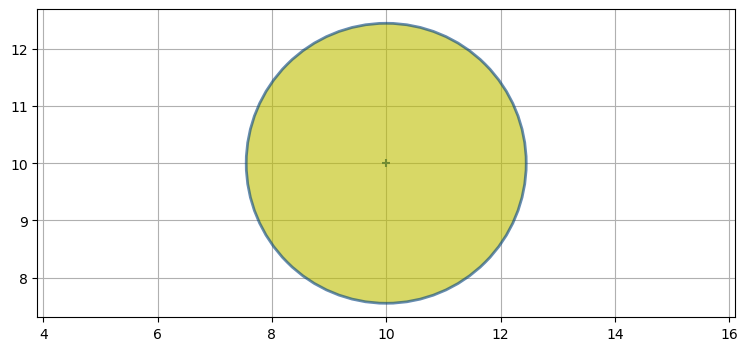

In [63]:
P0 = [[6, 0], [0, 6]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)

Теперь предположим, что в левом нижнем углу самолета есть радар. Далее предположим, что измерение пеленга радара является точным, но измерение дальности является неточным. Ковариация для ошибки в измерении может выглядеть следующим образом (нанесена зеленым цветом поверх желтого предыдущего):

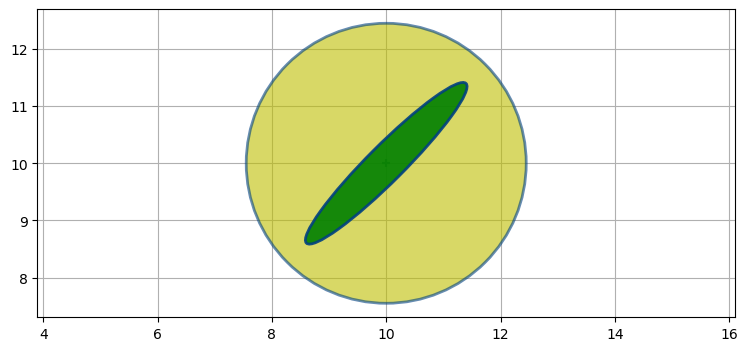

In [64]:
P1 = [[2, 1.9], [1.9, 2]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P1, fc='g', alpha=0.9)

Напомним, что байесовская статистика называет это "доказательством". Эллипс указывает на радар. Он очень длинный, потому что измерение дальности неточно, и самолет может находиться на значительном расстоянии от измеряемой дальности. Он очень узкий, потому что оценка пеленга очень точна, и поэтому воздушное судно должно быть очень близко к оценке пеленга.

Мы хотим найти *последующее* - среднее значение и ковариацию, которые являются результатом включения доказательств в предыдущее. Как и в любой другой главе, мы объединяем доказательства, умножая их вместе.

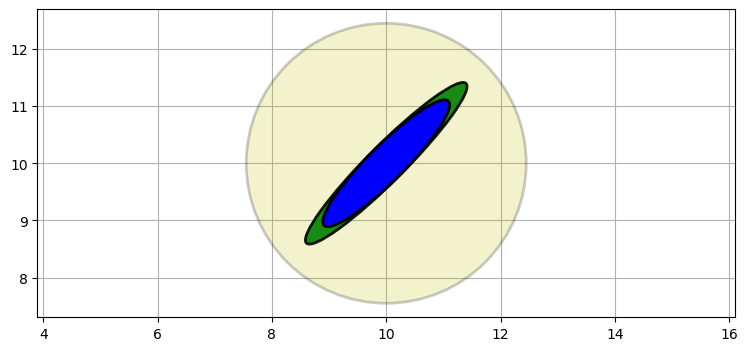

In [65]:
from filterpy.stats import multivariate_multiply

P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.9)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

Первоначальную оценка показана желтым цветом, показания радара - зеленые, а окончательная оценка  - синия.

Окончательная оценка сохранила ту же форму и положение, что и при радиолокационном измерении, но дисперсия меньше. Умножение двух гауссиан уменьшает дисперсию, потому что мы включаем больше информации. Еще один момент, который следует учитывать, заключается в том, что форма ковариации отражает физическую компоновку самолета и радиолокационной системы. 

Теперь предположим, что мы получаем измерение со второго радара. Новое измерение отображается зеленым цветом.

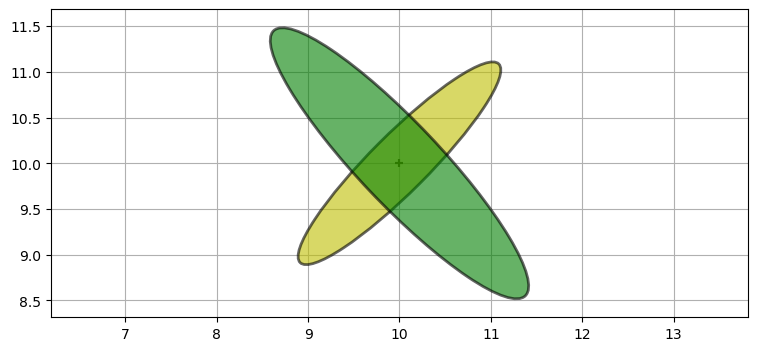

In [66]:
P3 = [[2, -1.9], [-1.9, 2.2]]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)

Мы включаем эту информацию, умножая 2 гауссовскх распределния:

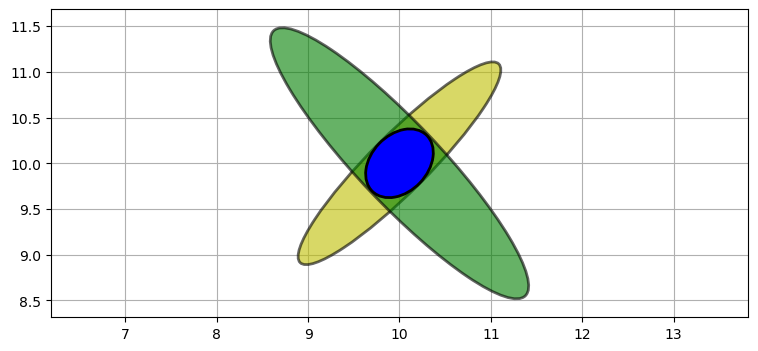

In [30]:
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

Единственное вероятное место для самолета - это место, где пересекаются два эллипса. Пересечение является новым гауссовым. Формы отражают геометрию задачи. Это позволяет нам *триангулировать* на самолете, что приводит к очень точной оценке.

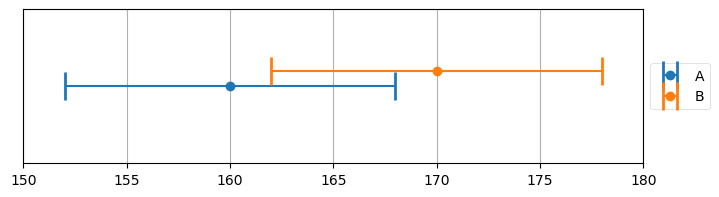

In [31]:
import kf_book.book_plots as book_plots
book_plots.plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

Предположим, что первый радар находится непосредственно слева от самолета. Смоделируем погрешность измерения с помощью
$$\Sigma = \begin{bmatrix}2&0\\0&0.2\end{bmatrix}$$

Здесь мы видим результат умножения

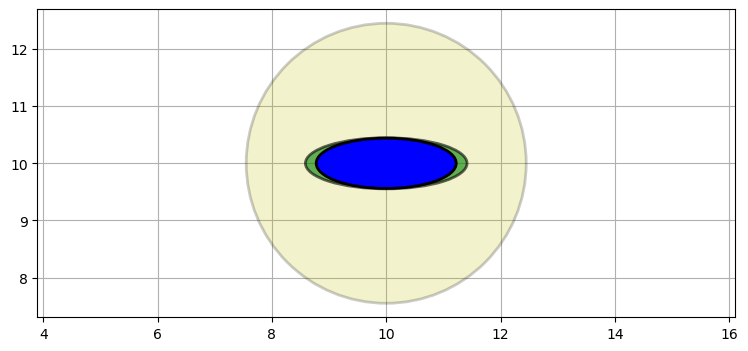

In [32]:
P1 = [[2, 0], [0, .2]]
P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

Теперь мы можем включить измерения со второй радиолокационной системы, которую мы оставим в том же положении, что и раньше.

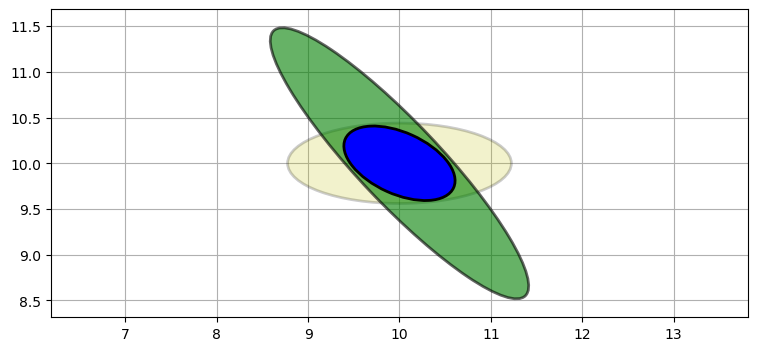

In [33]:
P3 = [[2, -1.9], [-1.9, 2.2]]
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

Наша оценка не так точна, как в предыдущем примере. Две радиолокационные станции больше не ортогональны друг другу относительно положения самолета, поэтому триангуляция не является оптимальной.

В качестве последнего примера представьте, что вы проводите два измерения с одного и того же радара с небольшим интервалом времени. Эллипсы ковариации будут почти перекрываться, оставляя очень большую ошибку в нашей новой оценке:

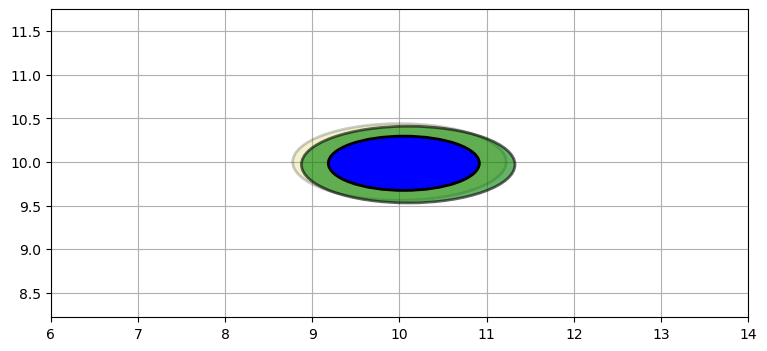

In [34]:
P5 = multivariate_multiply((10,10), P2, (10.1, 9.97), P2)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10.1, 9.97), P2, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse(P5[0], P5[1], ec='k', fc='b')
plt.xlim(6, 14);

## Скрытые переменные

Допустим, мы отслеживаем воздушное судно и получаем следующие данные для координат $x$ и $y$ в момент времени $t$=1, 2 и 3 секунды. Каким будет значение $x$ будет в момент времени $t$=4 секунды?

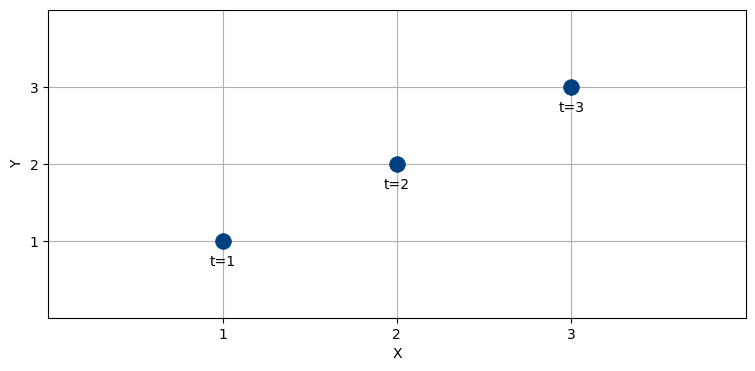

In [35]:
mkf_internal.show_position_chart()

Наиболее разумное предположение состоит в том, что при $t$=4 самолет находится на (4,4).

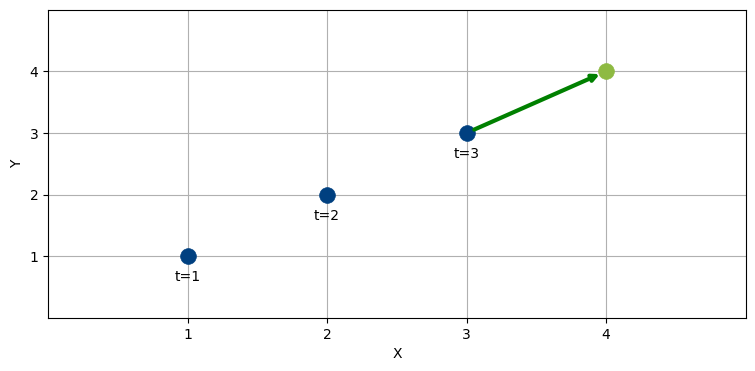

In [41]:
mkf_internal.show_position_prediction_chart()

Мы сделали этот вывод, потому что мы *вывели* постоянную скорость для самолета. Разумное
предположение состоит в том, что самолет перемещается на одну единицу каждый в *x* и *y* за один временной шаг. В момент времени 1 мы можем быть достаточно уверены в положении (x=0), но понятия не имеем о скорости. Мы можем построить это с помощью ковариационной матрицы, подобной этой. Более узкая ширина выражает нашу относительную уверенность в местоположении, а большая высота выражает наше незнание скорости.

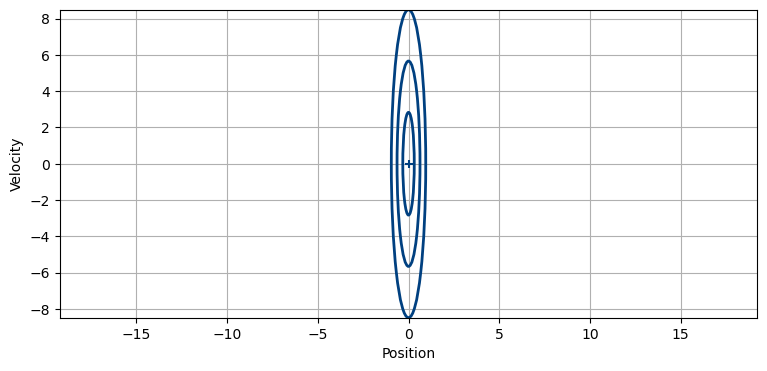

In [37]:
mkf_internal.show_x_error_chart(1)

Однако положение и скорость взаимосвязаны. Если скорость составляет 5 м/с, то через 1 секунду положение будет 5 м. Если скорость равна -10 м/с, то через 1 секунду положение будет равно -10 м. Давайте визуализируем это с помощью ковариации скорости, нарисованной по диагонали.

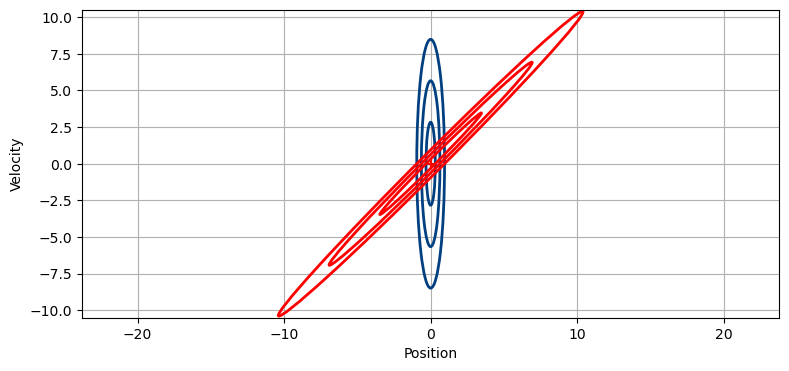

In [38]:
mkf_internal.show_x_error_chart(2)

На данный момент ковариация скорости нам не помогает. Мы не можем предсказать новое положение, потому что понятия не имеем, какова скорость. Но через одну секунду мы получаем обновление позиции x=5.

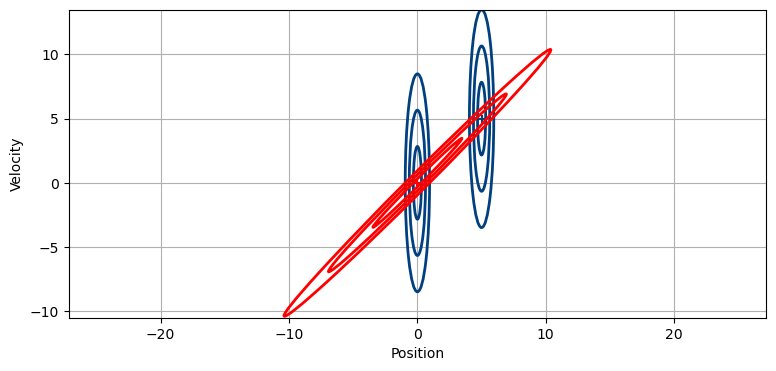

In [39]:
mkf_internal.show_x_error_chart(3)

В этой суперпозиции двух ковариаций и происходит волшебство. Единственная разумная оценка в момент времени t=1 (где позиция=5) - это примерно пересечение ковариации скорости и ковариации измерения. Точнее, мы можем умножить две ковариации вместе. С байесовской точки зрения мы умножаем предшествующее на вероятность существования (*правдоподобие*), чтобы получить последующее. Если мы умножим ковариацию положения на ковариацию скорости, используя байесовские уравнения, мы получим этот результат:

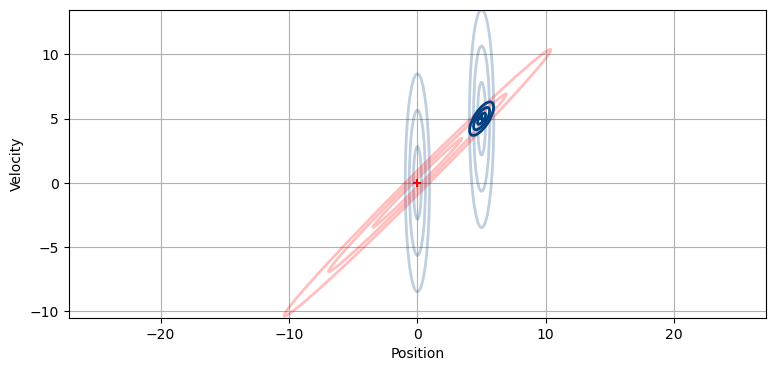

In [40]:
mkf_internal.show_x_error_chart(4)

Новая ковариация лежит на пересечении ковариации положения и ковариации скорости. Она слегка наклонена, показывая, что существует некоторая корреляция между положением и скоростью. Гораздо важнее то, что значение намного меньше, чем ковариации положения или скорости. Наше отклонение уменьшалось бы каждый раз, когда мы выполняли "обновление()", потому что предыдущая оценка была умножена на новое измерение. То же самое происходит и здесь. Однако здесь улучшение заметно лучше. Это происходит потому, что мы используем две разные части информации, которые, тем не менее, взаимосвязаны. Приблизительное знание скорости, их соотношения и положения позволяет нам сделать очень точную оценку. Это нелегко увидеть на этой диаграмме, но неопределенность в положении стала меньше. Мы знаем это, потому что новая ковариация не достигает по оси x такой величины, как ковариация измерения при t=1. Таким образом, мы не просто более уверены в скорости, но мы также более уверены в положении, чем были бы, если бы мы использовали только измерение положения без учета скорости!

Радар только определяет местоположение самолета. Это называется *наблюдаемой переменной*. Основываясь на оценках положения, мы можем вычислить скорость. Мы называем скорость *скрытой переменной*, т.к нет датчика, измеряющего скорость, поэтому его значение скрыто от нас. Мы можем использовать корреляцию между положением и скоростью, чтобы очень точно определить ее значение.

Чтобы дополнить терминологию, существуют также *ненаблюдаемые переменные*. Например, состояние самолета включает такие вещи, как курс, обороты двигателя, вес, цвет, имя пилота и так далее. Мы не можем ощутить их непосредственно с помощью датчика положения, поэтому они не *наблюдаются*. Невозможно *вывести* их из измерений и корреляций датчиков (красные плоскости не движутся быстрее белых плоскостей), поэтому они не *скрыты*. Вместо этого они *ненаблюдаемы*. Если вы включите ненаблюдаемую переменную в состояние фильтра, оценка этой переменной будет бессмысленной.

Допустим, что мы наложили скорость с другого самолета на график положения. Очевидно, что эти два понятия не связаны, и нет никакого способа, чтобы объединение этих двух понятий могло дать какую-либо дополнительную информацию. Напротив, скорость этого самолета говорит нам о чем-то очень важном - о направлении и скорости движения. До тех пор, пока самолет не изменит свою скорость, скорость позволяет нам предсказать, где находится следующая позиция. После относительно небольшой ошибки в скорости вероятность того, что она хорошо совпадает с позицией, очень мала. Подумайте об этом - если вы внезапно измените направление, ваша позиция также сильно изменится. Если измерение положения происходит не в направлении изменения скорости, то это очень маловероятно. Эти два фактора взаимосвязаны, поэтому, если скорость меняется, то должно изменяться и положение, причем предсказуемым образом. Важно понимать, что мы используем в своих интересах тот факт, что скорость и положение взаимосвязаны. Мы получаем приблизительную оценку скорости по расстоянию и времени между двумя измерениями и используем теорему Байеса для получения очень точных оценок всего после нескольких наблюдений. 

## Пространства высокой размерности

Сделаем некоторые зашумленные данные с заданной ковариацией, просто чтобы мы могли построить их внутри эллипсоида.

In [48]:
from filterpy.stats import plot_3d_covariance

mu = [0.3, 5., 10.]
C = np.array([[1.0, .03, .2],
              [.03,  4.0, .0],
              [.2,  .0, 16.1]])

sample = np.random.multivariate_normal(mu, C, size=1000)

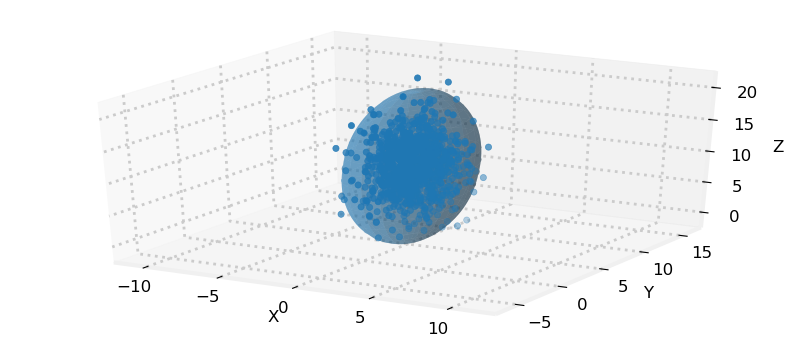

In [49]:
ax = plot_3d_covariance(mu, C, alpha=.4, std=3, limit_xyz=True)
ax.scatter(sample[:, 0], sample[:, 1], zs=sample[:, 2],);

Теория утверждает, что примерно 99 % распределения будет находиться в пределах 3 стандартных отклонений, и, похоже, это так.

## Выводы

Мы воспользовались геометрией и корреляциями системы для получения очень точной оценки. Математике все равно, работаем ли мы с двумя позициями, или с позицией и коррелированной скоростью, или это пространственные измерения. Если площадь этажа коррелирует с ценой дома, вы можете написать фильтр Калмана для отслеживания цен на жилье. Если возраст коррелирует с заболеваемостью, вы можете написать фильтр Калмана для отслеживания заболеваний. Привыкайте думать о них как о гауссианах с корреляциями. Если мы сможем выразить наши неопределенности в виде многомерного гауссова, мы сможем затем умножить предыдущее значение на вероятность и получить гораздо более точный результат.